# Universidad de Buenos Aires
# Deep Learning - Examen
# Agosto 2023



El examen comienza al momento de recibir este correo y la ventana de entrega estará abierta hasta el domingo 27 de Agosto a las 20:00hs. Toda comunicación con otros alumnos respecto del examen y la resolución de los ejercicios, queda estrictamente prohibida. Los exámenes serán comparados desde el punto de vista de la redacción, de los resultados y del código para determinar que el trabajo fue 100% individual y único. El examen es a libro abierto, pudiendo utilizar los contenidos vistos en clase y otra bibliografía. Todas las soluciones deben ser originales y si se toman ideas de fuentes externas deben ser correctamente citas incluyendo el correspondiente link o página de libro.

El formato de entrega debe ser un “link a un colab” (compartir a las siguientes direcciones: maxit1992@gmail.com y lelectronfou@gmail.com ) o un “link a un notebook en un github público”.

**Consideraciones a tener en cuenta:**
- Se entregará 1 solo colab para la totalidad del examen.
- Renombrar el archivo de la siguiente manera: **APELLIDO-NOMBRE-DL-Examen AGOSTO 2023.ipynb**
- Los códigos deben poder ejecutarse.
- Los resultados, cómo el código y las explicaciones deben quedar guardados y visualizables en el correspondiente link.
- Prestar atención a las consignas, responder las preguntas cuando corresponda.



## Ejercicio 1



Dada la siguiente función:

$$
f(x,y) = (1.5 - x + xy)^2 + (2.25-x+xy^2)^2 + (2.625 -x + xy^3)^2
$$


Encontrar el punto donde la función es mínima y el valor de dicho mínimo:

a. Utilizando SGD y cálculo de gradiente con regla de la cadena.

b. Utilizando SGD y pytorch.

Resolución:

a. Hallamos la gradiente como
$$
 \nabla f(x,y) = (\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y})
$$

Calculamos la derivada parciale con respecto a X
$$
\frac{\partial f}{\partial x} = 2(1.5 - x + xy)\frac{\partial }{\partial x}(1.5 - x + xy) + 2(2.25 - x + xy^2)\frac{\partial }{\partial x}(2.25 - x + xy^2) + 2(2.625 - x + xy^3)\frac{\partial }{\partial x}(2.625 - x + xy^3)
$$

Entonces
$$
\frac{\partial f}{\partial x} = 2(1.5 - x + xy)(y-1) + 2(2.25 - x + xy^2)(y^2 -1) + 2(2.625 - x + xy^3)(y^3 - 1)
$$

Calculamos la derivada parcial con respecto a Y

$$
\frac{\partial f}{\partial y} = 2(1.5 - x + xy)\frac{\partial }{\partial y}(1.5 - x + xy) + 2(2.25 - x + xy^2)\frac{\partial }{\partial y}(2.25 - x + xy^2) + 2(2.625 - x + xy^3)\frac{\partial }{\partial y}(2.625 - x + xy^3)
$$

Quedando como

$$
\frac{\partial f}{\partial y} = 2(1.5 - x + xy)(x) + 2(2.25 - x + xy^2)(2xy) + 2(2.625 - x + xy^3)(3xy^2)
$$

In [ ]:
from numpy.random.mtrand import seed
# Utilizando SGD y cálculo de gradiente con regla de la cadena

# Importamos librerias
import numpy as np

# Primero configuramos parametros iniciales
lr = 0.01
n_epoch = 100
x = np.random.rand() # numero random entre 0 y 1
y = np.random.rand() # numero random entre 0 y 1
print(f"Inicializamos con X = {x} Y = {y}\n")

# Creamos Loop por epocas
for epoch in range(n_epoch):
  # Calculamos gradiente
  grad_x = 2*(1.5 - x + x*y)*(y-1) + 2*(2.25 - x + x*y**2)*(y**2 - 1) + 2*(2.625 - x + x*y**3)*(y**3 -1)
  grad_y = 2*(1.5 - x + x*y)*(x) + 2*(2.25 - x + x*y**2)*(2*x*y) + 2*(2.625 - x + x*y**3)*(3*x*y**2)

  print(f"Gradiente x: {grad_x} y: {grad_y} para la epoca: {epoch}")

  # Actualizamos parametros
  x -= (lr * grad_x) #Nos movemos en direccion al gradiente negativo para encontrar el minimo
  y -= (lr * grad_y) #Nos movemos en direccion al gradiente negativo para encontrar el minimo

# Calculamos minimo de la funcion
f_min = (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2
print("---")
print(f"El punto donde la función es mínima: ({x},{y})")
print("---")
print(f"El valor del mínimo: {f_min}")

Inicializamos con X = 0.9037979652275434 Y = 0.3344435883137056

Gradiente x: -7.145507205793557 y: 4.438471057519891 para la epoca: 0
Gradiente x: -6.897439944172297 y: 3.9344405745565525 para la epoca: 1
Gradiente x: -6.602437823193087 y: 3.459091245510516 para la epoca: 2
Gradiente x: -6.280213143073555 y: 3.016771954481279 para la epoca: 3
Gradiente x: -5.94538399260226 y: 2.6091130507300884 para la epoca: 4
Gradiente x: -5.6085311793931005 y: 2.2359385213876677 para la epoca: 5
Gradiente x: -5.277135679668689 y: 1.8960053184521333 para la epoca: 6
Gradiente x: -4.956344127783643 y: 1.587523547679936 para la epoca: 7
Gradiente x: -4.649564941814399 y: 1.3084862254311371 para la epoca: 8
Gradiente x: -4.358920498347187 y: 1.0568581668368977 para la epoca: 9
Gradiente x: -4.0855858634037325 y: 0.8306710344316052 para la epoca: 10
Gradiente x: -3.8300417574228094 y: 0.6280613677632669 para la epoca: 11
Gradiente x: -3.5922640388088567 y: 0.4472774670519003 para la epoca: 12
Gradiente 

**Analisis**

Como se puede observar el minimo de la función f(x,y) se halló a traves de SGD, donde se configuró un valor inicial entre 0 y 1 de nuestros parametros x e y. Posteriormente, se calculó la gradiente de la funcion f(x,y) y se añadio un learning rate (lr) para luego ir actualizando los parametros iniciales de x e y a traves de la ecuación.

$$
x = x - (lr*\nabla fx)
$$

$$
y = y - (lr*\nabla fy)
$$

De este modo, para cada epoca se busca el sentido o dirección hacia la gradiente negativa y se logra obtener un minimo de la función. Cabe destacar que hay veces donde realmente encontramos un minimo local en vez del minimo global lo cual es un problema del SGD.

Ahora se hará lo mismo, pero usando el framework de Pytorch

In [ ]:
# Utilizando SGD y pytorch.

# Importamos librerias
import torch

# Primero configuramos parametros iniciales
lr = 0.01
n_epoch = 100
x_input = torch.rand(1, requires_grad=True) # numero random entre 0 y 1
y_input = torch.rand(1, requires_grad=True) # numero random entre 0 y 1
print(f"Inicializamos con X = {x_input} Y = {y_input}")

# Configuramos el optimizador de SGD
optimizer = torch.optim.SGD(params=[x_input,y_input], lr=lr)

for epoch in range(n_epoch):
  f = (1.5 - x_input + x_input*y_input)**2 + (2.25 - x_input + x_input*y_input**2)**2 + (2.625 - x_input + x_input*y_input**3)**2
  # limpio optimizer
  optimizer.zero_grad()
  # hacemos el calculo de gradientes
  f.backward()
  # Actualizamos
  optimizer.step()

x_output = x_input.item()
y_output = y_input.item()
v_min = f.item()
print("---")
print(f"El punto donde la función es mínima: ({x_output},{y_output})")
print("---")
print(f"El valor del mínimo: {v_min}")

Inicializamos con X = tensor([0.9294], requires_grad=True) Y = tensor([0.6837], requires_grad=True)
---
El punto donde la función es mínima: (2.4802143573760986,0.33703941106796265)
---
El valor del mínimo: 0.08247494697570801


## Ejercicio 2

Si tiene una imagen a procesar de 1024x720x3 y desea aplicar en cascada, 2 capas de convolución, seguido por una capa de activación y una de pooling,  con las siguientes características:

*Conv1:*
* tamaño kernel = 7x7
* padding = 2
* stride = 1
* número de kernel = 16

*Conv2:*
* tamaño kernel = 5x5
* padding = 0
* stride = 1
* número de kernel = 32

*activación*
* Tanh()

*pooling*
* tamaño pooling = 5x5
* padding pooling = 0
* stride pooling = 5

a) ¿Cual es el tamaño final de la salida y cuantos canales tiene?

b) Si tiene que conectar esa salida a una `fully_connected` para clasificar 3 clases ¿que tamaño debe tener?






In [ ]:
# Importamos librerias
import torch
import numpy as np

# imagen de 1024x720x3
img = torch.rand(1, 3, 1024, 720)

# Definimos arquitectura
conv1 = torch.nn.Conv2d(in_channels=3, out_channels=16, kernel_size=7, padding=2, stride=1)
conv2 = torch.nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, padding=0, stride=1)
tanh = torch.nn.Tanh()
pooling = torch.nn.MaxPool2d(kernel_size=5, padding=0, stride=5)

# forward
x_in = conv1(img)
x_in = conv2(x_in)
x_in = tanh(x_in)
x_in = pooling(x_in)

print(f"Tamaño de imagen de entrada: \n{img.shape}")
print("---")
print(f"Tamaño de imagen de salida: \n{x_in.shape}")
print("---")
print(f"Numero de canales imagen de salida: \n{x_in.shape[1]}")

Tamaño de imagen de entrada: 
torch.Size([1, 3, 1024, 720])
---
Tamaño de imagen de salida: 
torch.Size([1, 32, 203, 142])
---
Numero de canales imagen de salida: 
32


In [ ]:
# Si tiene que conectar esa salida a una fully_connected para clasificar 3 clases ¿que tamaño debe tener?
n_neurons = x_in.shape[1]*x_in.shape[2]*x_in.shape[3]
print(f"Numero de neuronas necesarias en la fc \n{n_neurons}")

# fully-connected para 3 clases y 922432 pixeles a la entrada
fc = torch.nn.Linear(in_features=n_neurons, out_features=3)
# hacemos el reshape del tensor con pytorch a 2D
fc_output = fc(x_in.view(x_in.shape[0], -1))
print("---")
print(f"Salida de la fully connected: \n{fc_output.shape}")

Numero de neuronas necesarias en la fc 
922432
---
Salida de la fully connected: 
torch.Size([1, 3])


**Analisis**

Si tiene que conectar esa salida a una fully_connected para clasificar 3 clases ¿que tamaño debe tener?

El tamaño corresponde a la cantidad de pixeles que tengamos a la salida de nuestra CNN. Esto se debe a que nuestra NN fully connected va a esperar tener tantas neuronas a la entrada, como cantidad de pixeles tenga la imagen.

En este caso, se tiene a la salida del Pooling 32(filtros) x 203 x 142. Lo que va a ser igual a 922.432 pixeles. Entonces, la cantidad de neuronas a la entrada de la fully connected será igual.

## Ejercicio 3




Para la siguiente red neuronal recurrente, se pide expresar las ecuaciones "*unfolded*" de la salida de la misma y de sus estados ocultos, si el vector de entrada son 3 muestras secuenciadas de la variable $x(t)$.

![b](https://drive.google.com/uc?export=view&id=1Fz46GTK7Oy_w5OEgwLCLfHFMr7b6-AnL)




Ecuaciones de la RNN:

$$ \hat{y}(t) = w_{h1y} * h1(t) + w_{h2y} * h2(t) + by$$

$$ h1(t) = w_{xh1} * x(t) + w_{h1h1} * h1(t-1) + w_{h2h1} * h2(t-1)+ bh1$$
$$ h2(t) = w_{xh2} * x(t) + w_{h2h2} * h2(t-1) + w_{h1h2} * h1(t-1)+ bh2 $$

Resolucion
--

Si se tiene un vector con 3 muestras secuenciales, entonces decimos que
$$x(t) = x(1), x(2), x(3)$$

Donde x(1), x(2), x(3) puede ser cualquier numero real.

**Se tiene que para x(1):**

Primera capa oculta
$$
h1(1) = w_{xh1} * x(1) + w_{h1h1} * h1(0) + w_{h2h1} * h2(0)+ bh1
$$

Como el estado anterior h1(0) = 0 y h2(0) = 0, entonces que daría de la siguiente forma

$$
h1(1) = w_{xh1} * x(1) + bh1
$$

ahora para la segunda capa oculta

$$
h2(1) = w_{xh2} * x(1) + w_{h2h2} * h2(0) + w_{h1h2} * h1(0)+ bh2
$$

Siendo el estado anterior h1(0) = 0 y h2(0) = 0

$$
h2(1) = w_{xh2} * x(1) + bh2
$$

Por ultimo la salida quedaría

$$
\hat{y}(1) = w_{h1y} * h1(1) + w_{h2y} * h2(1) + by
$$

$$
\hat{y}(1) = w_{h1y} * (w_{xh1} * x(1) + bh1) + w_{h2y} * (w_{xh2} * x(1) + bh2) + by
$$

**Para el siguiente termino x(2):**

$$
h1(2) = w_{xh1} * x(2) + w_{h1h1} * h1(1) + w_{h2h1} * h2(1)+ bh1
$$

$$
h2(2) = w_{xh2} * x(2) + w_{h2h2} * h2(1) + w_{h1h2} * h1(1)+ bh2
$$

Donde h1(1), h2(1) contienen el valor del estado anterior por lo tanto quedaría

$$
h1(2) = w_{xh1} * x(2) + w_{h1h1} * (w_{xh1} * x(1) + bh1) + w_{h2h1} * (w_{xh2} * x(1) + bh2)+ bh1
$$

$$
h2(2) = w_{xh2} * x(2) + w_{h2h2} * (w_{xh2} * x(1) + bh2) + w_{h1h2} * (w_{xh1} * x(1) + bh1)+ bh2
$$

Y su salida

$$
\hat{y}(2) = w_{h1y} * h1(2) + w_{h2y} * h2(2) + by
$$

$$
\hat{y}(2) = w_{h1y} * [w_{xh1} * x(2) + w_{h1h1} * (w_{xh1} * x(1) + bh1) + w_{h2h1} * (w_{xh2} * x(1) + bh2)+ bh1] + w_{h2y} * [w_{xh2} * x(2) + w_{h2h2} * (w_{xh2} * x(1) + bh2) + w_{h1h2} * (w_{xh1} * x(1) + bh1)+ bh2] + by
$$

**Para el ultimo termino x(3):**

$$
h1(3) = w_{xh1} * x(3) + w_{h1h1} * h1(2) + w_{h2h1} * h2(2)+ bh1
$$

$$
h2(3) = w_{xh2} * x(3) + w_{h2h2} * h2(2) + w_{h1h2} * h1(2)+ bh2
$$

Ahora se tendría que expandiendo la funcion con los valores de las capas ocultas del estado anterior, pero en este caso no lo incluyo porque se vuelve ilegible.

Ahora para la salida se tendrá

$$
\hat{y}(3) = w_{h1y} * h1(3) + w_{h2y} * h2(3) + by
$$

$$
\hat{y}(3) = w_{h1y} * [w_{xh1} * x(3) + w_{h1h1} * h1(2) + w_{h2h1} * h2(2)+ bh1] + w_{h2y} * [w_{xh2} * x(3) + w_{h2h2} * h2(2) + w_{h1h2} * h1(2)+ bh2] + by
$$

## Ejercicio 4



Descargar el dataset del siguiente link: https://drive.google.com/file/d/1X8_G5BpQMi-Nnbtms2RL8lcWSxzD8ixd/view?usp=sharing. El dataset son compras de productos que diferentes clientes realizaron durante un black sales. El dataset contiene información sobre las transacciones y el objetivo es poder utilizar el dataset para crear diferentes modelos que puedan predecir cuánto un cliente está dispuesto a gastar en un producto en el futuro. Particularmente, vamos a tratar este problema como una clasificación binaria donde queremos averiguar si el cliente va a gastar mucha plata (más de 9000) o poca plata (menos de 9000).

- a)	Entrenar un modelo de deep learning que no utilice embeddings y que no emplee el `user_id` ni el `product_id`.
- b)	Entrenar un modelo de deep learning que utilice embeddings tanto para los productos como los usuarios. Realizar el mapeo de identificador de producto y usuarios a indices antes de separar el dataset en training, validation y testing.
- c)	Grafique las curvas de la loss function en función de las epochs de cada modelo y comente lo necesario.
- d) Compare el score de cada modelo.



In [ ]:
# Subimos dataset
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving dataset_black_sales.csv to dataset_black_sales.csv
User uploaded file "dataset_black_sales.csv" with length 25525678 bytes


### Minimo EDA

In [ ]:
# Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# cargamos el dataframe
df = pd.read_csv('/content/dataset_black_sales.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
# Tamaño del dataset
n_samples, n_features = df.shape
print(f"Cantidad de Observaciones: {n_samples}, Cantidad de caracteristicas: {n_features}")

Cantidad de Observaciones: 550068, Cantidad de caracteristicas: 12


In [ ]:
# valores nulos
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [ ]:
# Tipo de dato
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [ ]:
# Valores unicos para gender
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [ ]:
# Variable con alta cardinalidad
len(df['User_ID'].unique())

5891

In [ ]:
# Variable con alta cardinalidad
len(df['Product_ID'].unique())

3631

In [ ]:
# valores de Age
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
# valores de City_Category
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [ ]:
# valores de Stay_In_Current_City_Years
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [ ]:
# valores de Product_Category_3
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [ ]:
# valores de Product_Category_3
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [ ]:
# cantidad de observaciones perdidas
observaciones_prod2 = 550068
missing_prod2 = 173638
print(f"cantidas de observaciones faltantes para Product_Category_2 = {(missing_prod2*100)/observaciones_prod2}%")

observaciones_prod3 = 550068
missing_prod3 = 166821
print(f"cantidas de observaciones faltantes para Product_Category_3 = {(missing_prod3*100)/observaciones_prod3}%")

cantidas de observaciones faltantes para Product_Category_2 = 31.566642669633573%
cantidas de observaciones faltantes para Product_Category_3 = 30.327341346888023%


In [ ]:
# estudiamos correlacion
df_corr = df.copy()
df_corr = df_corr.select_dtypes(include='number')

df_corr.columns

Index(['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

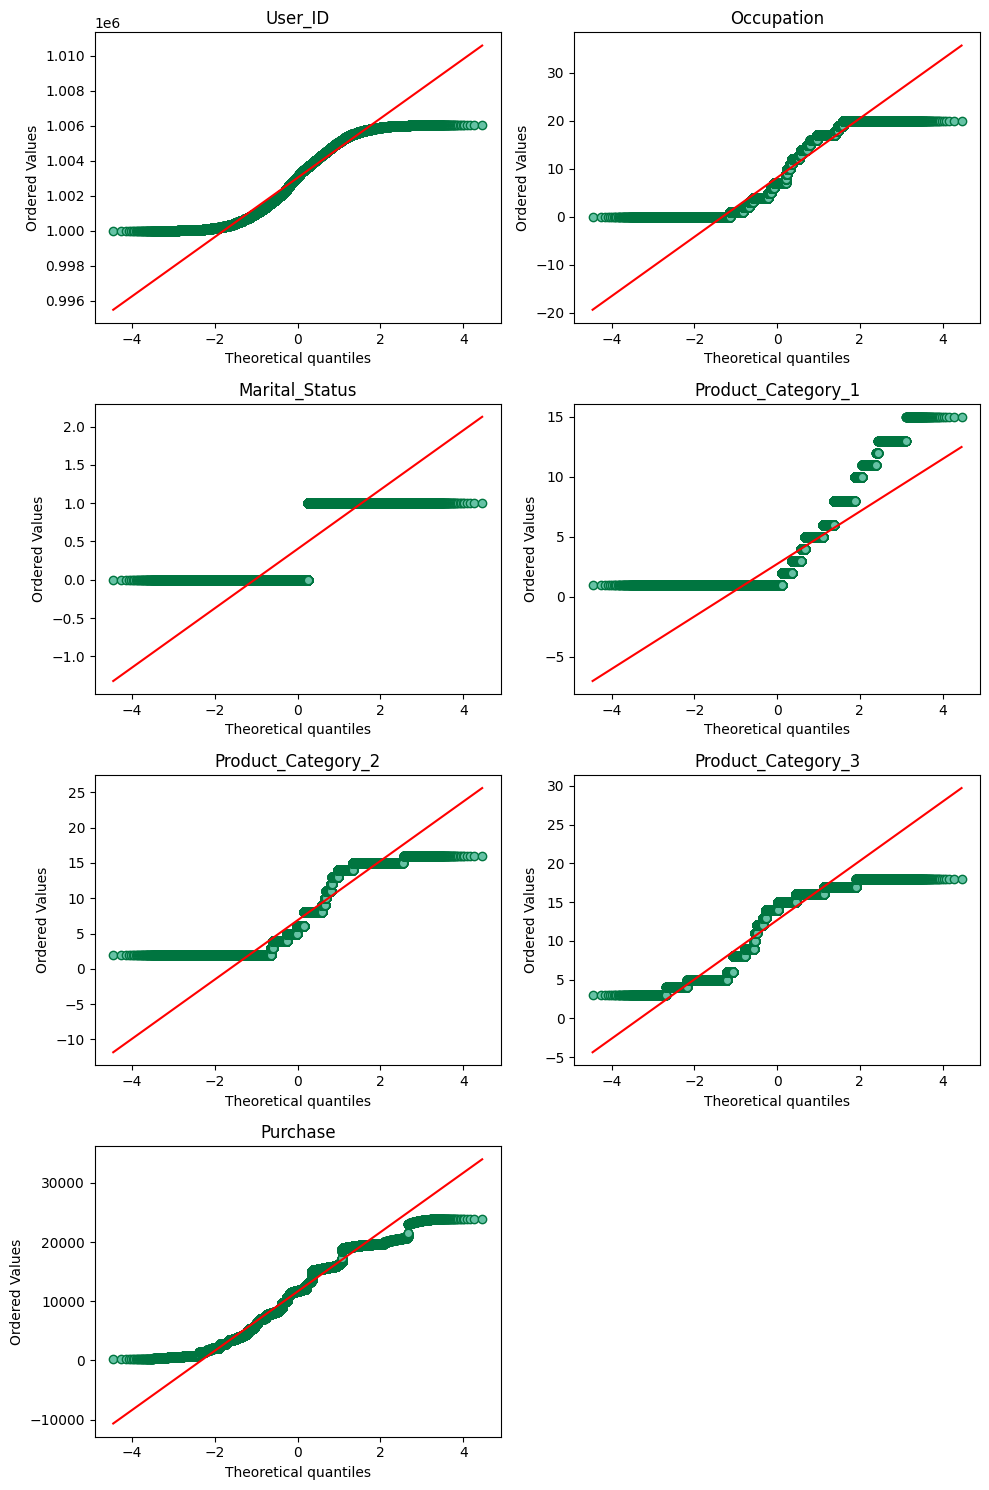

In [ ]:
# buscamos si existe linealidad en las features
from scipy import stats
import matplotlib.pyplot as plt

df_corr.dropna(inplace=True)

num_features = len(df_corr.columns)
num_rows = (num_features + 1) // 2
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 15))

for k, xi in enumerate(df_corr.columns):
    row = k // num_cols
    col = k % num_cols
    stats.probplot(df_corr[xi], dist="norm", plot=axes[row, col])
    axes[row, col].set_title(xi)
    axes[row, col].get_lines()[0].set_markerfacecolor('#66c2a5')
    axes[row, col].get_lines()[0].set_markeredgecolor('#007540')


if num_features % 2 != 0:
    axes[num_rows - 1, num_cols - 1].axis("off")

plt.tight_layout()
plt.show()

**Analisis**

No se observa una linealidad sobre todas las features numericas, por lo tanto, no se puede hacer un estudio de correlacion con pearson y se tendra que realizar con spearman

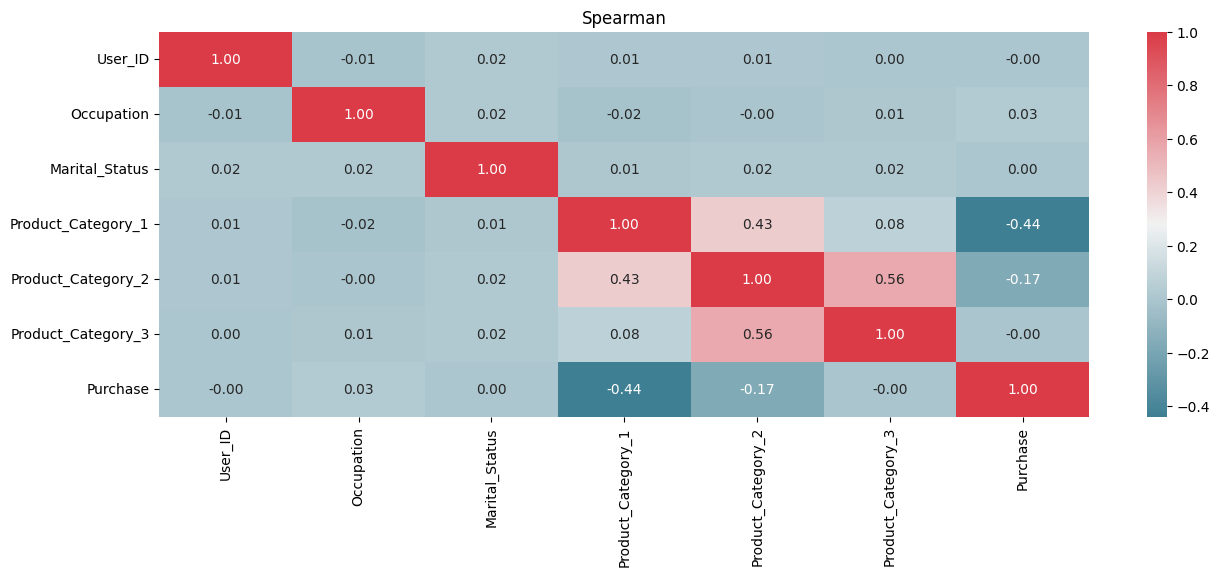

In [ ]:
corr = df_corr.corr(method='spearman')
fig = plt.figure(figsize=(15,5))
plt.title("Spearman")
sns.heatmap(corr, cmap=sns.diverging_palette(220,10,as_cmap=True),annot=True,fmt=".2f")
sns.set(font_scale=0.9)

**Analisis**

Se observa muy poca correlación con la variable objetivo por parte de las variables numericas. Tambien se observar que "Product_Category_1" tiene una correlacion negativa con respecto a "Purchase" lo que indica que estan inversamente relacionadas. Por otro lado, "Product_Category_2" y "Product_Category_3" estan altamente correlacionadas entre si.

El dataset cuenta con valores nulos en las variables "Product_Category_2" y "Product_Category_3". Al tener más del 5% de datos faltantes en ambos casos, se decide descartar ambdas columnas del dataset.

La caracteristica "Gender" al solo contener F y M se puede encodear con 0 para F y 1 para M.

"User_ID" y "Product_ID" son caracteristicas con cardinalidad alta, por lo tanto, serán más adelante nuestra capa de Embeddings.

"Age" son grupos de edades que pueden ser mapeadas a un formato distinto para que el modelo las puede procesar. Formato propuesto:
  * '0-17' = 0
  * '18-25' = 1
  * '26-35' = 2
  * '36-45' = 3
  * '46-50' = 4
  * '51-55' = 5
  * '55+' = 6

"City_Category" al ser una caracteristica con cardinalidad baja se puede usar un OneHotEncoding.

"Stay_In_Current_City_Years" puede matener la cantidad de años 0,1,2,3 pero para 4+ lo mapeamos a solo 4 y con eso asumimos 4 años o más.

Por ultimo, "Purchase" se binariza como pide el enunciado. Se creara una nueva columna Purchase_Quantity que si es > 9000 es igual a 1 y si es < 9000 es igual a 0.

### Feature engineering

In [ ]:
# Importamos librerias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# imputamos valores nulos eliminando ambas columnas
df.drop(columns=['Product_Category_2', 'Product_Category_3'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category_1          550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Purchase                      0
dtype: int64

#### Encoding de variables categoricas

In [ ]:
# Encoding Gender
dict_gender = {
    'M':'1',
    'F':'0'
}
df[['Gender']] = df[['Gender']].replace(dict_gender).astype(float)
df['Gender'].unique()

array([0., 1.])

In [ ]:
# Tratamos la feature Age
dict_age = {
    '0-17':'0',
    '18-25':'1',
    '26-35':'2',
    '36-45':'3',
    '46-50':'4',
    '51-55':'5',
    '55+':'6'
}
df[['Age']] = df[['Age']].replace(dict_age).astype(float)
df['Age'].unique()

array([0., 6., 2., 4., 5., 3., 1.])

In [ ]:
# tratamos Stay_In_Current_City_Years
df[['Stay_In_Current_City_Years']] = df[['Stay_In_Current_City_Years']].replace({'4+':'4'}).astype(float)
df['Stay_In_Current_City_Years'].unique()

array([2., 4., 3., 1., 0.])

In [ ]:
# aplicamos OneHotEncoding para City_Category
ohe = pd.get_dummies(df['City_Category'], prefix='City_Category')
ohe

,City_Category_A,City_Category_B,City_Category_C
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
550063,0,1,0
550064,0,0,1
550065,0,1,0
550066,0,0,1


In [ ]:
# Unimos con dataset
df = pd.concat([df, ohe], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  float64
 3   Age                         550068 non-null  float64
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  float64
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Purchase                    550068 non-null  int64  
 10  City_Category_A             550068 non-null  uint8  
 11  City_Category_B             550068 non-null  uint8  
 12  City_Category_C             550068 non-null  uint8  
dtypes: float64(3),

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,City_Category_A,City_Category_B,City_Category_C
0,1000001,P00069042,0.0,0.0,10,A,2.0,0,3,8370,1,0,0
1,1000001,P00248942,0.0,0.0,10,A,2.0,0,1,15200,1,0,0
2,1000001,P00087842,0.0,0.0,10,A,2.0,0,12,1422,1,0,0
3,1000001,P00085442,0.0,0.0,10,A,2.0,0,12,1057,1,0,0
4,1000002,P00285442,1.0,6.0,16,C,4.0,0,8,7969,0,0,1


In [ ]:
# creamos nueva feature que será nuestra variable objetivo
df['Purchase_Quantity'] = df['Purchase'].apply(lambda purchase:0 if purchase<=9000 else 1)
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,City_Category_A,City_Category_B,City_Category_C,Purchase_Quantity
0,1000001,P00069042,0.0,0.0,10,A,2.0,0,3,8370,1,0,0,0
1,1000001,P00248942,0.0,0.0,10,A,2.0,0,1,15200,1,0,0,1
2,1000001,P00087842,0.0,0.0,10,A,2.0,0,12,1422,1,0,0,0
3,1000001,P00085442,0.0,0.0,10,A,2.0,0,12,1057,1,0,0,0
4,1000002,P00285442,1.0,6.0,16,C,4.0,0,8,7969,0,0,1,0
5,1000003,P00193542,1.0,2.0,15,A,3.0,0,1,15227,1,0,0,1
6,1000004,P00184942,1.0,4.0,7,B,2.0,1,1,19215,0,1,0,1
7,1000004,P00346142,1.0,4.0,7,B,2.0,1,1,15854,0,1,0,1
8,1000004,P0097242,1.0,4.0,7,B,2.0,1,1,15686,0,1,0,1
9,1000005,P00274942,1.0,2.0,20,A,1.0,1,8,7871,1,0,0,0


In [ ]:
# features que reservamos a Embedding
user_id = df['User_ID']
prd_id = df['Product_ID']
# armamos x e y
x = df.drop(columns=['City_Category', 'Purchase', 'Purchase_Quantity', 'User_ID', 'Product_ID'], axis=1)
y = df['Purchase_Quantity']

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  float64
 1   Age                         550068 non-null  float64
 2   Occupation                  550068 non-null  int64  
 3   Stay_In_Current_City_Years  550068 non-null  float64
 4   Marital_Status              550068 non-null  int64  
 5   Product_Category_1          550068 non-null  int64  
 6   City_Category_A             550068 non-null  uint8  
 7   City_Category_B             550068 non-null  uint8  
 8   City_Category_C             550068 non-null  uint8  
dtypes: float64(3), int64(3), uint8(3)
memory usage: 26.8 MB


In [ ]:
# paso el resto de features a punto flotante
list_feature = ['Occupation', 'Marital_Status', 'Product_Category_1',
            'City_Category_A', 'City_Category_B', 'City_Category_C']
for i in range(len(list_feature)):
  x[list_feature[i]] = x[list_feature[i]].astype(float)

x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  float64
 1   Age                         550068 non-null  float64
 2   Occupation                  550068 non-null  float64
 3   Stay_In_Current_City_Years  550068 non-null  float64
 4   Marital_Status              550068 non-null  float64
 5   Product_Category_1          550068 non-null  float64
 6   City_Category_A             550068 non-null  float64
 7   City_Category_B             550068 non-null  float64
 8   City_Category_C             550068 non-null  float64
dtypes: float64(9)
memory usage: 37.8 MB


In [ ]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 550068 entries, 0 to 550067
Series name: Purchase_Quantity
Non-Null Count   Dtype
--------------   -----
550068 non-null  int64
dtypes: int64(1)
memory usage: 4.2 MB


#### Normalizamos

In [ ]:
x.var(ddof=0)

Gender                         0.185938
Age                            1.832315
Occupation                    42.545022
Stay_In_Current_City_Years     1.662659
Marital_Status                 0.241837
Product_Category_1            15.493732
City_Category_A                0.196430
City_Category_B                0.243642
City_Category_C                0.214350
dtype: float64

In [ ]:
# guardo nombre de las columnas
x_columns = x.columns
x_columns

Index(['Gender', 'Age', 'Occupation', 'Stay_In_Current_City_Years',
       'Marital_Status', 'Product_Category_1', 'City_Category_A',
       'City_Category_B', 'City_Category_C'],
      dtype='object')

In [ ]:
# Normalizamos
standard_scale = StandardScaler()
x_scaled = standard_scale.fit_transform(x[x_columns])

# convertimos de vuelta dataframe
x = pd.DataFrame(x_scaled, columns=x_columns)
x.var(ddof=0)

Gender                        1.0
Age                           1.0
Occupation                    1.0
Stay_In_Current_City_Years    1.0
Marital_Status                1.0
Product_Category_1            1.0
City_Category_A               1.0
City_Category_B               1.0
City_Category_C               1.0
dtype: float64

In [ ]:
# pasamos x e y a formato numpy
x = x.to_numpy()
y = y.to_numpy()

#### Dividimos dataset

In [ ]:
# dividimos dataset
train_ratio = 0.70
test_ratio = 0.30

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_ratio)
print("Train: ", X_train.shape,y_train.shape)
print("Test:", X_test.shape,y_test.shape)

Train:  (385047, 9) (385047,)
Test: (165021, 9) (165021,)


### Modelo sin Embeddings

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn import metrics
from tqdm import tqdm
import seaborn as sns

In [ ]:
# armamos clase dataset de pytorch
class CustomDataset(Dataset):
  def __init__(self, x, y):
        self.x = x
        self.y = y

  def __len__(self):
    return len(self.x)

  def __getitem__(self, idx):
    return self.x[idx], self.y[idx]

In [ ]:
# armo dataset de entrenamiento y test
train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)

In [ ]:
# pruebo funcionamiento de __len__
len(train_dataset)

385047

In [ ]:
# pruebo funcionamiento de __getitem__
train_dataset[5]

(array([ 0.57256962, -1.10549345, -0.47169551, -1.44125784,  1.20045427,
         0.65944943, -0.6059248 ,  1.17450616, -0.67214331]),
 1)

In [ ]:
# cargo la data en batches
train_dl = DataLoader(train_dataset, batch_size=1000, shuffle=True)
test_dl = DataLoader(test_dataset, batch_size=1000)

In [ ]:
# Armamos arquitectura
class NN(torch.nn.Module):
  def __init__(self) -> None:
    super().__init__()
    self.Linear_1 = torch.nn.Linear(in_features=9, out_features=512, bias=True)
    self.relu_1 = torch.nn.ReLU()
    self.Linear_2 = torch.nn.Linear(in_features=512, out_features=200, bias=True)
    self.relu_2 = torch.nn.ReLU()
    self.Linear_3 = torch.nn.Linear(in_features=200, out_features=1, bias=True)

  def forward(self, x):
    x = self.Linear_1(x)
    x = self.relu_1(x)
    x = self.Linear_2(x)
    x = self.relu_2(x)
    x = self.Linear_3(x)
    return x

In [ ]:
# instanciamos la NN
nn = NN()
print(nn)

NN(
  (Linear_1): Linear(in_features=9, out_features=512, bias=True)
  (relu_1): ReLU()
  (Linear_2): Linear(in_features=512, out_features=200, bias=True)
  (relu_2): ReLU()
  (Linear_3): Linear(in_features=200, out_features=1, bias=True)
)


In [ ]:
# configuramos device
device = "cpu"
if torch.cuda.is_available():
  device = "cuda:0"

# copio NN al cpu/gpu
nn = nn.to(device)
print(f"la NN se encuentran en el {device}")

la NN se encuentran en el cuda:0


In [ ]:
# creamos funcion de perdida
loss_fn = torch.nn.BCEWithLogitsLoss(reduction='sum')
# instanciamos optimizador de Adam
opt = torch.optim.Adam(nn.parameters(), lr=0.0001)

In [ ]:
# Mini-batch
n_epoch = 100
train_loss = []
test_loss = []

for epoch in tqdm(range(n_epoch)):
  # Entrenamiento de la NN
  nn.train(True)

  # inicializamos variables
  loss_epoch = 0 # perdida por epoca
  y_epoch = []  # guarda valor real
  y_pred_epoch = [] # guarda valor predicho

  for i,data in enumerate(train_dl):
    # obtenemos batch del set de entrenamiento
    x_batch, y_batch = data
    # copiamos batch al dispositivo donde esta la NN
    x_batch = x_batch.to(device).float()
    y_batch = y_batch.to(device).float().reshape(-1,1)

    # limpio el optimizador
    opt.zero_grad()
    # paso forward
    nn_forward_out = nn(x_batch)
    y_batch_pred = torch.sigmoid(nn_forward_out) #utilizo sigmoid para la clasificacion.

    # calculo de la perdida -> loss(input, target)
    loss = loss_fn(nn_forward_out, y_batch)

    # paso backward
    loss.backward()

    # Actualizamos parametros
    opt.step()

    # guardamos valor real y predicho
    y_epoch += list(y_batch.detach().cpu().numpy())
    y_pred_epoch += list(y_batch_pred.detach().cpu().numpy())

    # acumulo la perdida
    loss_epoch += loss.item()

  loss_epoch = loss_epoch / X_train.shape[0]
  train_loss.append(loss_epoch)

  # accuracy por epoca
  accuracy = metrics.accuracy_score(y_epoch, [j>=0.5 for j in y_pred_epoch])

  ############
  # test dataset
  # modo de prediccion
  nn.train(False)

  loss_epoch_test = 0
  y_epoch_test = []
  y_pred_epoch_test = []

  for i,data in enumerate(test_dl):

    x_batch, y_batch = data
    x_batch = x_batch.to(device).float()
    y_batch = y_batch.to(device).float().reshape(-1,1)

    #forward
    nn_forward_out = nn(x_batch)
    y_batch_pred = torch.sigmoid(nn_forward_out)

    # perdida
    loss = loss_fn(nn_forward_out, y_batch)

    # guardamos valores reales y predichos
    y_epoch_test += list(y_batch.detach().cpu().numpy())
    y_pred_epoch_test += list(y_batch_pred.detach().cpu().numpy())

    # acumulamos perdida
    loss_epoch_test += loss.item()

  loss_epoch_test = loss_epoch_test / X_test.shape[0]
  test_loss.append(loss_epoch_test)
  # sacamos metrica
  accuracy_test = metrics.accuracy_score(y_epoch_test, [ j >= 0.5 for j in y_pred_epoch_test])

  print(f"\nEpoch {epoch +1} | " \
      f"Train/Test loss: {loss_epoch:.3f} / {loss_epoch_test:.3f} | " \
      f"Train/Test accuracy: {accuracy:.3f} / {accuracy_test:.3f}")

  1%|          | 1/100 [00:07<11:37,  7.04s/it]


Epoch 1 | Train/Test loss: 0.535 / 0.487 | Train/Test accuracy: 0.771 / 0.783


  2%|▏         | 2/100 [00:13<11:14,  6.88s/it]


Epoch 2 | Train/Test loss: 0.483 / 0.476 | Train/Test accuracy: 0.784 / 0.790


  3%|▎         | 3/100 [00:19<10:13,  6.32s/it]


Epoch 3 | Train/Test loss: 0.472 / 0.464 | Train/Test accuracy: 0.789 / 0.790


  4%|▍         | 4/100 [00:26<10:15,  6.42s/it]


Epoch 4 | Train/Test loss: 0.460 / 0.452 | Train/Test accuracy: 0.789 / 0.790


  5%|▌         | 5/100 [00:31<09:44,  6.15s/it]


Epoch 5 | Train/Test loss: 0.448 / 0.440 | Train/Test accuracy: 0.788 / 0.790


  6%|▌         | 6/100 [00:38<09:53,  6.31s/it]


Epoch 6 | Train/Test loss: 0.437 / 0.429 | Train/Test accuracy: 0.789 / 0.790


  7%|▋         | 7/100 [00:43<09:20,  6.03s/it]


Epoch 7 | Train/Test loss: 0.426 / 0.419 | Train/Test accuracy: 0.789 / 0.792


  8%|▊         | 8/100 [00:50<09:38,  6.29s/it]


Epoch 8 | Train/Test loss: 0.416 / 0.409 | Train/Test accuracy: 0.791 / 0.797


  9%|▉         | 9/100 [00:56<09:11,  6.06s/it]


Epoch 9 | Train/Test loss: 0.407 / 0.400 | Train/Test accuracy: 0.801 / 0.812


 10%|█         | 10/100 [01:02<09:26,  6.29s/it]


Epoch 10 | Train/Test loss: 0.398 / 0.392 | Train/Test accuracy: 0.815 / 0.820


 11%|█         | 11/100 [01:08<08:58,  6.05s/it]


Epoch 11 | Train/Test loss: 0.391 / 0.386 | Train/Test accuracy: 0.821 / 0.821


 12%|█▏        | 12/100 [01:15<09:14,  6.30s/it]


Epoch 12 | Train/Test loss: 0.385 / 0.379 | Train/Test accuracy: 0.824 / 0.826


 13%|█▎        | 13/100 [01:21<08:51,  6.11s/it]


Epoch 13 | Train/Test loss: 0.380 / 0.376 | Train/Test accuracy: 0.827 / 0.829


 14%|█▍        | 14/100 [01:27<08:55,  6.22s/it]


Epoch 14 | Train/Test loss: 0.376 / 0.372 | Train/Test accuracy: 0.829 / 0.832


 15%|█▌        | 15/100 [01:33<08:32,  6.03s/it]


Epoch 15 | Train/Test loss: 0.373 / 0.371 | Train/Test accuracy: 0.831 / 0.839


 16%|█▌        | 16/100 [01:39<08:43,  6.23s/it]


Epoch 16 | Train/Test loss: 0.370 / 0.366 | Train/Test accuracy: 0.834 / 0.837


 17%|█▋        | 17/100 [01:45<08:24,  6.08s/it]


Epoch 17 | Train/Test loss: 0.368 / 0.365 | Train/Test accuracy: 0.836 / 0.839


 18%|█▊        | 18/100 [01:52<08:32,  6.25s/it]


Epoch 18 | Train/Test loss: 0.366 / 0.363 | Train/Test accuracy: 0.839 / 0.842


 19%|█▉        | 19/100 [01:57<08:12,  6.08s/it]


Epoch 19 | Train/Test loss: 0.364 / 0.362 | Train/Test accuracy: 0.841 / 0.842


 20%|██        | 20/100 [02:04<08:22,  6.28s/it]


Epoch 20 | Train/Test loss: 0.363 / 0.360 | Train/Test accuracy: 0.843 / 0.847


 21%|██        | 21/100 [02:09<07:54,  6.01s/it]


Epoch 21 | Train/Test loss: 0.361 / 0.359 | Train/Test accuracy: 0.845 / 0.848


 22%|██▏       | 22/100 [02:16<08:08,  6.26s/it]


Epoch 22 | Train/Test loss: 0.360 / 0.358 | Train/Test accuracy: 0.846 / 0.844


 23%|██▎       | 23/100 [02:22<07:50,  6.10s/it]


Epoch 23 | Train/Test loss: 0.359 / 0.357 | Train/Test accuracy: 0.848 / 0.846


 24%|██▍       | 24/100 [02:29<07:53,  6.23s/it]


Epoch 24 | Train/Test loss: 0.358 / 0.356 | Train/Test accuracy: 0.849 / 0.846


 25%|██▌       | 25/100 [02:34<07:32,  6.03s/it]


Epoch 25 | Train/Test loss: 0.357 / 0.355 | Train/Test accuracy: 0.850 / 0.848


 26%|██▌       | 26/100 [02:41<07:41,  6.24s/it]


Epoch 26 | Train/Test loss: 0.356 / 0.353 | Train/Test accuracy: 0.850 / 0.850


 27%|██▋       | 27/100 [02:46<07:20,  6.03s/it]


Epoch 27 | Train/Test loss: 0.355 / 0.353 | Train/Test accuracy: 0.851 / 0.851


 28%|██▊       | 28/100 [02:53<07:27,  6.22s/it]


Epoch 28 | Train/Test loss: 0.354 / 0.352 | Train/Test accuracy: 0.851 / 0.852


 29%|██▉       | 29/100 [02:59<07:09,  6.04s/it]


Epoch 29 | Train/Test loss: 0.353 / 0.351 | Train/Test accuracy: 0.852 / 0.852


 30%|███       | 30/100 [03:05<07:14,  6.21s/it]


Epoch 30 | Train/Test loss: 0.353 / 0.350 | Train/Test accuracy: 0.852 / 0.853


 31%|███       | 31/100 [03:11<06:52,  5.97s/it]


Epoch 31 | Train/Test loss: 0.352 / 0.350 | Train/Test accuracy: 0.852 / 0.853


 32%|███▏      | 32/100 [03:17<07:02,  6.21s/it]


Epoch 32 | Train/Test loss: 0.351 / 0.350 | Train/Test accuracy: 0.852 / 0.854


 33%|███▎      | 33/100 [03:23<06:44,  6.04s/it]


Epoch 33 | Train/Test loss: 0.350 / 0.349 | Train/Test accuracy: 0.852 / 0.852


 34%|███▍      | 34/100 [03:30<06:53,  6.26s/it]


Epoch 34 | Train/Test loss: 0.350 / 0.347 | Train/Test accuracy: 0.852 / 0.854


 35%|███▌      | 35/100 [03:35<06:29,  5.99s/it]


Epoch 35 | Train/Test loss: 0.349 / 0.347 | Train/Test accuracy: 0.853 / 0.854


 36%|███▌      | 36/100 [03:42<06:37,  6.22s/it]


Epoch 36 | Train/Test loss: 0.348 / 0.346 | Train/Test accuracy: 0.853 / 0.854


 37%|███▋      | 37/100 [03:48<06:20,  6.04s/it]


Epoch 37 | Train/Test loss: 0.347 / 0.346 | Train/Test accuracy: 0.853 / 0.854


 38%|███▊      | 38/100 [03:54<06:23,  6.19s/it]


Epoch 38 | Train/Test loss: 0.346 / 0.345 | Train/Test accuracy: 0.853 / 0.854


 39%|███▉      | 39/100 [04:00<06:07,  6.02s/it]


Epoch 39 | Train/Test loss: 0.346 / 0.344 | Train/Test accuracy: 0.853 / 0.855


 40%|████      | 40/100 [04:06<06:10,  6.18s/it]


Epoch 40 | Train/Test loss: 0.345 / 0.343 | Train/Test accuracy: 0.853 / 0.854


 41%|████      | 41/100 [04:12<05:50,  5.94s/it]


Epoch 41 | Train/Test loss: 0.344 / 0.342 | Train/Test accuracy: 0.853 / 0.854


 42%|████▏     | 42/100 [04:18<05:56,  6.15s/it]


Epoch 42 | Train/Test loss: 0.343 / 0.341 | Train/Test accuracy: 0.853 / 0.855


 43%|████▎     | 43/100 [04:24<05:41,  5.99s/it]


Epoch 43 | Train/Test loss: 0.342 / 0.343 | Train/Test accuracy: 0.853 / 0.853


 44%|████▍     | 44/100 [04:30<05:44,  6.14s/it]


Epoch 44 | Train/Test loss: 0.341 / 0.339 | Train/Test accuracy: 0.853 / 0.854


 45%|████▌     | 45/100 [04:36<05:26,  5.93s/it]


Epoch 45 | Train/Test loss: 0.340 / 0.339 | Train/Test accuracy: 0.853 / 0.854


 46%|████▌     | 46/100 [04:42<05:30,  6.12s/it]


Epoch 46 | Train/Test loss: 0.339 / 0.338 | Train/Test accuracy: 0.853 / 0.855


 47%|████▋     | 47/100 [04:48<05:17,  5.98s/it]


Epoch 47 | Train/Test loss: 0.338 / 0.337 | Train/Test accuracy: 0.853 / 0.855


 48%|████▊     | 48/100 [04:54<05:15,  6.06s/it]


Epoch 48 | Train/Test loss: 0.338 / 0.337 | Train/Test accuracy: 0.854 / 0.854


 49%|████▉     | 49/100 [05:00<05:03,  5.94s/it]


Epoch 49 | Train/Test loss: 0.337 / 0.336 | Train/Test accuracy: 0.854 / 0.854


 50%|█████     | 50/100 [05:06<05:00,  6.01s/it]


Epoch 50 | Train/Test loss: 0.336 / 0.334 | Train/Test accuracy: 0.854 / 0.854


 51%|█████     | 51/100 [05:12<04:52,  5.98s/it]


Epoch 51 | Train/Test loss: 0.335 / 0.334 | Train/Test accuracy: 0.854 / 0.854


 52%|█████▏    | 52/100 [05:18<04:40,  5.85s/it]


Epoch 52 | Train/Test loss: 0.334 / 0.333 | Train/Test accuracy: 0.854 / 0.855


 53%|█████▎    | 53/100 [05:24<04:41,  5.98s/it]


Epoch 53 | Train/Test loss: 0.333 / 0.332 | Train/Test accuracy: 0.854 / 0.856


 54%|█████▍    | 54/100 [05:29<04:28,  5.83s/it]


Epoch 54 | Train/Test loss: 0.332 / 0.332 | Train/Test accuracy: 0.855 / 0.855


 55%|█████▌    | 55/100 [05:36<04:26,  5.92s/it]


Epoch 55 | Train/Test loss: 0.331 / 0.331 | Train/Test accuracy: 0.855 / 0.855


 56%|█████▌    | 56/100 [05:41<04:15,  5.80s/it]


Epoch 56 | Train/Test loss: 0.331 / 0.333 | Train/Test accuracy: 0.856 / 0.853


 57%|█████▋    | 57/100 [05:48<04:18,  6.01s/it]


Epoch 57 | Train/Test loss: 0.330 / 0.329 | Train/Test accuracy: 0.856 / 0.859


 58%|█████▊    | 58/100 [05:53<04:05,  5.84s/it]


Epoch 58 | Train/Test loss: 0.329 / 0.330 | Train/Test accuracy: 0.857 / 0.858


 59%|█████▉    | 59/100 [05:59<04:06,  6.00s/it]


Epoch 59 | Train/Test loss: 0.328 / 0.328 | Train/Test accuracy: 0.858 / 0.856


 60%|██████    | 60/100 [06:05<03:54,  5.85s/it]


Epoch 60 | Train/Test loss: 0.327 / 0.327 | Train/Test accuracy: 0.858 / 0.859


 61%|██████    | 61/100 [06:11<03:54,  6.02s/it]


Epoch 61 | Train/Test loss: 0.326 / 0.326 | Train/Test accuracy: 0.859 / 0.860


 62%|██████▏   | 62/100 [06:17<03:41,  5.82s/it]


Epoch 62 | Train/Test loss: 0.326 / 0.325 | Train/Test accuracy: 0.860 / 0.861


 63%|██████▎   | 63/100 [06:23<03:43,  6.03s/it]


Epoch 63 | Train/Test loss: 0.325 / 0.325 | Train/Test accuracy: 0.860 / 0.861


 64%|██████▍   | 64/100 [06:29<03:31,  5.88s/it]


Epoch 64 | Train/Test loss: 0.324 / 0.323 | Train/Test accuracy: 0.861 / 0.862


 65%|██████▌   | 65/100 [06:35<03:32,  6.08s/it]


Epoch 65 | Train/Test loss: 0.324 / 0.323 | Train/Test accuracy: 0.861 / 0.861


 66%|██████▌   | 66/100 [06:41<03:20,  5.90s/it]


Epoch 66 | Train/Test loss: 0.323 / 0.322 | Train/Test accuracy: 0.862 / 0.863


 67%|██████▋   | 67/100 [06:47<03:21,  6.12s/it]


Epoch 67 | Train/Test loss: 0.323 / 0.322 | Train/Test accuracy: 0.862 / 0.862


 68%|██████▊   | 68/100 [06:53<03:09,  5.91s/it]


Epoch 68 | Train/Test loss: 0.322 / 0.322 | Train/Test accuracy: 0.862 / 0.862


 69%|██████▉   | 69/100 [06:59<03:09,  6.12s/it]


Epoch 69 | Train/Test loss: 0.321 / 0.320 | Train/Test accuracy: 0.862 / 0.863


 70%|███████   | 70/100 [07:05<02:58,  5.94s/it]


Epoch 70 | Train/Test loss: 0.321 / 0.321 | Train/Test accuracy: 0.863 / 0.863


 71%|███████   | 71/100 [07:11<02:57,  6.11s/it]


Epoch 71 | Train/Test loss: 0.320 / 0.320 | Train/Test accuracy: 0.863 / 0.863


 72%|███████▏  | 72/100 [07:17<02:46,  5.93s/it]


Epoch 72 | Train/Test loss: 0.320 / 0.319 | Train/Test accuracy: 0.863 / 0.863


 73%|███████▎  | 73/100 [07:24<02:46,  6.18s/it]


Epoch 73 | Train/Test loss: 0.319 / 0.320 | Train/Test accuracy: 0.863 / 0.864


 74%|███████▍  | 74/100 [07:29<02:36,  6.03s/it]


Epoch 74 | Train/Test loss: 0.319 / 0.318 | Train/Test accuracy: 0.863 / 0.864


 75%|███████▌  | 75/100 [07:36<02:35,  6.21s/it]


Epoch 75 | Train/Test loss: 0.318 / 0.318 | Train/Test accuracy: 0.863 / 0.864


 76%|███████▌  | 76/100 [07:41<02:22,  5.96s/it]


Epoch 76 | Train/Test loss: 0.318 / 0.318 | Train/Test accuracy: 0.863 / 0.864


 77%|███████▋  | 77/100 [07:48<02:21,  6.14s/it]


Epoch 77 | Train/Test loss: 0.318 / 0.319 | Train/Test accuracy: 0.863 / 0.865


 78%|███████▊  | 78/100 [07:53<02:10,  5.95s/it]


Epoch 78 | Train/Test loss: 0.318 / 0.319 | Train/Test accuracy: 0.863 / 0.864


 79%|███████▉  | 79/100 [08:00<02:08,  6.12s/it]


Epoch 79 | Train/Test loss: 0.317 / 0.317 | Train/Test accuracy: 0.864 / 0.864


 80%|████████  | 80/100 [08:06<01:59,  5.96s/it]


Epoch 80 | Train/Test loss: 0.317 / 0.317 | Train/Test accuracy: 0.864 / 0.864


 81%|████████  | 81/100 [08:12<01:56,  6.13s/it]


Epoch 81 | Train/Test loss: 0.317 / 0.317 | Train/Test accuracy: 0.864 / 0.864


 82%|████████▏ | 82/100 [08:17<01:46,  5.90s/it]


Epoch 82 | Train/Test loss: 0.316 / 0.316 | Train/Test accuracy: 0.864 / 0.864


 83%|████████▎ | 83/100 [08:24<01:42,  6.04s/it]


Epoch 83 | Train/Test loss: 0.316 / 0.317 | Train/Test accuracy: 0.864 / 0.863


 84%|████████▍ | 84/100 [08:30<01:35,  5.94s/it]


Epoch 84 | Train/Test loss: 0.316 / 0.318 | Train/Test accuracy: 0.864 / 0.863


 85%|████████▌ | 85/100 [08:36<01:30,  6.05s/it]


Epoch 85 | Train/Test loss: 0.316 / 0.317 | Train/Test accuracy: 0.864 / 0.864


 86%|████████▌ | 86/100 [08:41<01:22,  5.89s/it]


Epoch 86 | Train/Test loss: 0.315 / 0.315 | Train/Test accuracy: 0.864 / 0.864


 87%|████████▋ | 87/100 [08:47<01:16,  5.89s/it]


Epoch 87 | Train/Test loss: 0.315 / 0.315 | Train/Test accuracy: 0.864 / 0.864


 88%|████████▊ | 88/100 [08:53<01:11,  5.98s/it]


Epoch 88 | Train/Test loss: 0.315 / 0.315 | Train/Test accuracy: 0.864 / 0.864


 89%|████████▉ | 89/100 [08:59<01:04,  5.83s/it]


Epoch 89 | Train/Test loss: 0.315 / 0.315 | Train/Test accuracy: 0.864 / 0.864


 90%|█████████ | 90/100 [09:05<00:59,  5.97s/it]


Epoch 90 | Train/Test loss: 0.315 / 0.316 | Train/Test accuracy: 0.864 / 0.865


 91%|█████████ | 91/100 [09:11<00:52,  5.86s/it]


Epoch 91 | Train/Test loss: 0.314 / 0.315 | Train/Test accuracy: 0.864 / 0.865


 92%|█████████▏| 92/100 [09:18<00:49,  6.13s/it]


Epoch 92 | Train/Test loss: 0.314 / 0.314 | Train/Test accuracy: 0.864 / 0.864


 93%|█████████▎| 93/100 [09:23<00:41,  5.95s/it]


Epoch 93 | Train/Test loss: 0.314 / 0.314 | Train/Test accuracy: 0.864 / 0.864


 94%|█████████▍| 94/100 [09:30<00:36,  6.14s/it]


Epoch 94 | Train/Test loss: 0.314 / 0.316 | Train/Test accuracy: 0.864 / 0.864


 95%|█████████▌| 95/100 [09:36<00:30,  6.09s/it]


Epoch 95 | Train/Test loss: 0.314 / 0.314 | Train/Test accuracy: 0.864 / 0.864


 96%|█████████▌| 96/100 [09:42<00:24,  6.24s/it]


Epoch 96 | Train/Test loss: 0.314 / 0.314 | Train/Test accuracy: 0.864 / 0.864


 97%|█████████▋| 97/100 [09:49<00:19,  6.51s/it]


Epoch 97 | Train/Test loss: 0.314 / 0.314 | Train/Test accuracy: 0.864 / 0.864


 98%|█████████▊| 98/100 [09:56<00:13,  6.61s/it]


Epoch 98 | Train/Test loss: 0.313 / 0.315 | Train/Test accuracy: 0.864 / 0.863


 99%|█████████▉| 99/100 [10:03<00:06,  6.51s/it]


Epoch 99 | Train/Test loss: 0.313 / 0.315 | Train/Test accuracy: 0.864 / 0.863


100%|██████████| 100/100 [10:09<00:00,  6.09s/it]


Epoch 100 | Train/Test loss: 0.313 / 0.314 | Train/Test accuracy: 0.864 / 0.865


Text(0, 0.5, 'BinaryCrossEntropy')

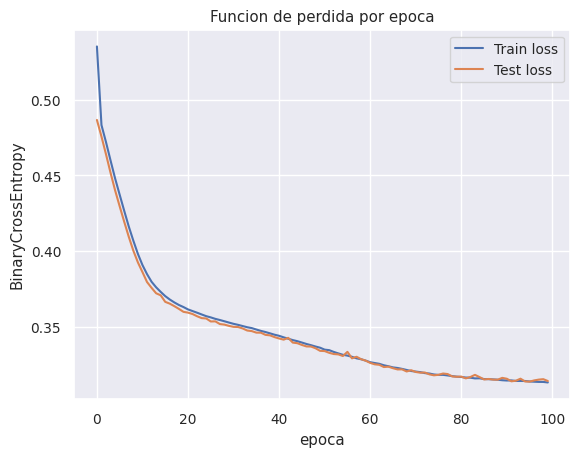

In [ ]:
fig, ax1= plt.subplots(1,1)
ax1.plot(train_loss, label="Train loss")
ax1.plot(test_loss, label="Test loss")
ax1.legend()
ax1.set_title("Funcion de perdida por epoca")
ax1.set_xlabel("epoca")
ax1.set_ylabel("BinaryCrossEntropy")

**Analisis**

Como se puede observar, la red neuronal bajo los hiperparametros y condiciones configuradas funciona bastante bien. teniendo un accuracy alrededor de 80-86%.

Viendo la curva de la funcion de perdida por epoca se puede apreciar varias cosas:

1.   El modelo no sufre de Overfitting, por lo tanto, no fue necesario aplicarle ninguna estrategia de regularización.
2.   Es notable que la red neuronal es capaz de aprender. Por lo que la curva del error acumulado descende a medida que pasan las epocas de entrenamiento.

Se notaron cambios importantes en el performance de la red neuronal con lo siguiente:

1.   Utilizando batches de entrenamiento y test de tamaño igual a 1000. Anteriormente se usaron batches de 32, 64 y 100, pero bajo estas condiciones la NN tardaba mucho en entrenar, incluso usando la GPU. Además, la función de perdida no disminuía como se esperaba a medida que avanzaban las epocas.
2.   Learning rate igual a 0.0001. Anteriormente se probo con 0.1 y el performance de la NN no fue muy bueno.
3.   El uso de la GPU tambien ayudó a que la velocidad de entrenamiento fuera mayor

Se puede notar que en esta red no se utilizaron Embeddings y las caracteristicas que tenían cardinalidad alta fueron descartadas de este entrenamiento.



### Modelo con Embeddings

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn import metrics
from tqdm import tqdm
import seaborn as sns

In [ ]:
# Usamos embeddings
user_id.unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529])

In [ ]:
prd_id.unique()

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00370293',
       'P00371644', 'P00370853'], dtype=object)

In [ ]:
# Mapeo a indices para ambas caracteristicas
user_id_idx = {value:key for key,value in enumerate(user_id.unique())}
prd_id_idx = {value:key for key,value in enumerate(prd_id.unique())}

In [ ]:
# Probamos buscar indices de valores
user_id_idx[1000002]

1

In [ ]:
prd_id_idx['P00087842']

2

In [ ]:
# Vectorizamos
vector_user_id = np.array([user_id_idx[value] for value in user_id])
vector_prd_id = np.array([prd_id_idx[value] for value in prd_id])

In [ ]:
vector_prd_id

array([   0,    1,    2, ..., 3626, 3626, 3629])

In [ ]:
vector_user_id

array([   0,    0,    0, ..., 5328, 5878, 5330])

In [ ]:
# Dividimos en train y test
vector_user_id_train, vector_user_id_test, _, _ = train_test_split(vector_user_id, y, test_size=test_ratio)
print("Train: ", vector_user_id_train.shape)
print("Test:", vector_user_id_test.shape)

Train:  (385047,)
Test: (165021,)


In [ ]:
vector_user_id_train

array([3478, 2709,  366, ..., 1082,  371, 2015])

In [ ]:
# Dividimos en train y test
vector_prd_id_train, vector_prd_id_test, _, _ = train_test_split(vector_prd_id, y, test_size=test_ratio)
print("Train: ", vector_prd_id_train.shape)
print("Test:", vector_prd_id_test.shape)

Train:  (385047,)
Test: (165021,)


In [ ]:
vector_prd_id_train

array([ 494, 2228, 2382, ..., 1356, 1191, 1661])

In [ ]:
# armamos clase dataset de pytorch con embeddings
class CustomDatasetEmb(Dataset):
  def __init__(self, x, embedding_1, embedding_2, y):
        self.x = x
        self.embedding_1 = embedding_1
        self.embedding_2 = embedding_2
        self.y = y

  def __len__(self):
    return len(self.x)

  def __getitem__(self, idx):
    return self.x[idx], self.embedding_1[idx], self.embedding_2[idx], self.y[idx]

In [ ]:
# armo dataset de entrenamiento y test
train_ds_emb = CustomDatasetEmb(X_train, vector_user_id_train, vector_prd_id_train, y_train)
test_ds_emb = CustomDatasetEmb(X_test, vector_user_id_test, vector_prd_id_test, y_test)

In [ ]:
# pruebo funcionamiento de __len__
len(train_ds_emb)

385047

In [ ]:
len(test_ds_emb)

165021

In [ ]:
# pruebo funcionamiento de __getitem__
train_ds_emb[5]

(array([ 0.57256962, -1.10549345, -0.47169551, -1.44125784,  1.20045427,
         0.65944943, -0.6059248 ,  1.17450616, -0.67214331]),
 461,
 2245,
 1)

In [ ]:
test_ds_emb[5]

(array([ 0.57256962,  0.37201475,  1.21473444, -1.44125784, -0.83301799,
        -1.11891197,  1.65036982, -0.85142167, -0.67214331]),
 1010,
 29,
 1)

In [ ]:
# cargo la data en batches
train_dl_emb = DataLoader(train_ds_emb, batch_size=1000, shuffle=True)
test_dl_emb = DataLoader(test_ds_emb, batch_size=1000)

In [ ]:
# Armamos arquitectura con Embeddings
class NNEmb(torch.nn.Module):
  def __init__(self) -> None:
    super().__init__()
    self.embedding_1 = torch.nn.Embedding(num_embeddings=5891, embedding_dim=10) # for user_id
    self.embedding_2 = torch.nn.Embedding(num_embeddings=3631, embedding_dim=10) # for prd_id
    self.Linear_1 = torch.nn.Linear(in_features=9+10+10, out_features=512, bias=True)
    self.relu_1 = torch.nn.ReLU()
    self.Linear_2 = torch.nn.Linear(in_features=512, out_features=200, bias=True)
    self.relu_2 = torch.nn.ReLU()
    self.Linear_3 = torch.nn.Linear(in_features=200, out_features=1, bias=True)

  def forward(self, x, user_emb, prd_emb):
    embedding_out_1 = self.embedding_1(user_emb)
    embedding_out_2 = self.embedding_2(prd_emb)
    x = torch.cat([x, embedding_out_1, embedding_out_2], dim=1)
    x = self.Linear_1(x)
    x = self.relu_1(x)
    x = self.Linear_2(x)
    x = self.relu_2(x)
    x = self.Linear_3(x)
    return x

In [ ]:
nn_emb = NNEmb()
print(nn_emb)

NNEmb(
  (embedding_1): Embedding(5891, 10)
  (embedding_2): Embedding(3631, 10)
  (Linear_1): Linear(in_features=29, out_features=512, bias=True)
  (relu_1): ReLU()
  (Linear_2): Linear(in_features=512, out_features=200, bias=True)
  (relu_2): ReLU()
  (Linear_3): Linear(in_features=200, out_features=1, bias=True)
)


In [ ]:
# configuramos device
device = "cpu"
if torch.cuda.is_available():
  device = "cuda:0"

# copio NN al cpu/gpu
nn_emb = nn_emb.to(device)
print(f"la NN se encuentran en el {device}")

la NN se encuentran en el cuda:0


In [ ]:
# creamos funcion de perdida
loss_fn = torch.nn.BCEWithLogitsLoss(reduction='sum')
# instanciamos optimizador de Adam
opt = torch.optim.Adam(nn_emb.parameters(), lr=0.0001)

In [ ]:
# Mini-batch
n_epoch = 100
train_loss = []
test_loss = []

for epoch in tqdm(range(n_epoch)):
  # Entrenamiento de la NN
  nn_emb.train(True)

  # inicializamos variables
  loss_epoch = 0 # perdida por epoca
  y_epoch = []  # guarda valor real
  y_pred_epoch = [] # guarda valor predicho

  for i,data in enumerate(train_dl_emb):
    # obtenemos batch del set de entrenamiento
    x_batch, embed_1_batch, embed_2_batch, y_batch = data
    # copiamos batch al dispositivo donde esta la NN
    x_batch = x_batch.to(device).float()
    embed_1_batch = embed_1_batch.to(device).int()
    embed_2_batch = embed_2_batch.to(device).int()
    y_batch = y_batch.to(device).float().reshape(-1,1)

    # limpio el optimizador
    opt.zero_grad()
    # paso forward
    nn_forward_out = nn_emb(x_batch, embed_1_batch, embed_2_batch)
    y_batch_pred = torch.sigmoid(nn_forward_out) #utilizo sigmoid para la clasificacion.

    # calculo de la perdida -> loss(input, target)
    loss = loss_fn(nn_forward_out, y_batch)

    # paso backward
    loss.backward()

    # Actualizamos parametros
    opt.step()

    # guardamos valor real y predicho
    y_epoch += list(y_batch.detach().cpu().numpy())
    y_pred_epoch += list(y_batch_pred.detach().cpu().numpy())

    # acumulo la perdida
    loss_epoch += loss.item()

  loss_epoch = loss_epoch / X_train.shape[0]
  train_loss.append(loss_epoch)

  # accuracy por epoca
  accuracy = metrics.accuracy_score(y_epoch, [j>=0.5 for j in y_pred_epoch])

  ############
  # test dataset
  # modo de prediccion
  nn_emb.train(False)

  loss_epoch_test = 0
  y_epoch_test = []
  y_pred_epoch_test = []

  for i,data in enumerate(test_dl_emb):

    x_batch, embed_1_batch, embed_2_batch, y_batch = data
    x_batch = x_batch.to(device).float()
    embed_1_batch = embed_1_batch.to(device).int()
    embed_2_batch = embed_2_batch.to(device).int()
    y_batch = y_batch.to(device).float().reshape(-1,1)

    #forward
    nn_forward_out = nn_emb(x_batch, embed_1_batch, embed_2_batch)
    y_batch_pred = torch.sigmoid(nn_forward_out)

    # perdida
    loss = loss_fn(nn_forward_out, y_batch)

    # guardamos valores reales y predichos
    y_epoch_test += list(y_batch.detach().cpu().numpy())
    y_pred_epoch_test += list(y_batch_pred.detach().cpu().numpy())

    # acumulamos perdida
    loss_epoch_test += loss.item()

  loss_epoch_test = loss_epoch_test / X_test.shape[0]
  test_loss.append(loss_epoch_test)
  # sacamos metrica
  accuracy_test = metrics.accuracy_score(y_epoch_test, [ j >= 0.5 for j in y_pred_epoch_test])

  print(f"\nEpoch {epoch +1} | " \
      f"Train/Test loss: {loss_epoch:.3f} / {loss_epoch_test:.3f} | " \
      f"Train/Test accuracy: {accuracy:.3f} / {accuracy_test:.3f}")

  1%|          | 1/100 [00:06<10:43,  6.50s/it]


Epoch 1 | Train/Test loss: 0.576 / 0.504 | Train/Test accuracy: 0.756 / 0.790


  2%|▏         | 2/100 [00:13<11:17,  6.92s/it]


Epoch 2 | Train/Test loss: 0.495 / 0.489 | Train/Test accuracy: 0.782 / 0.782


  3%|▎         | 3/100 [00:20<11:15,  6.97s/it]


Epoch 3 | Train/Test loss: 0.487 / 0.481 | Train/Test accuracy: 0.784 / 0.788


  4%|▍         | 4/100 [00:27<10:53,  6.81s/it]


Epoch 4 | Train/Test loss: 0.478 / 0.473 | Train/Test accuracy: 0.788 / 0.789


  5%|▌         | 5/100 [00:34<11:09,  7.05s/it]


Epoch 5 | Train/Test loss: 0.469 / 0.465 | Train/Test accuracy: 0.788 / 0.788


  6%|▌         | 6/100 [00:41<10:39,  6.80s/it]


Epoch 6 | Train/Test loss: 0.460 / 0.456 | Train/Test accuracy: 0.788 / 0.790


  7%|▋         | 7/100 [00:48<10:47,  6.96s/it]


Epoch 7 | Train/Test loss: 0.451 / 0.448 | Train/Test accuracy: 0.788 / 0.789


  8%|▊         | 8/100 [00:54<10:23,  6.78s/it]


Epoch 8 | Train/Test loss: 0.444 / 0.440 | Train/Test accuracy: 0.788 / 0.790


  9%|▉         | 9/100 [01:02<10:30,  6.93s/it]


Epoch 9 | Train/Test loss: 0.435 / 0.431 | Train/Test accuracy: 0.788 / 0.788


 10%|█         | 10/100 [01:08<10:09,  6.78s/it]


Epoch 10 | Train/Test loss: 0.425 / 0.420 | Train/Test accuracy: 0.789 / 0.790


 11%|█         | 11/100 [01:15<10:06,  6.81s/it]


Epoch 11 | Train/Test loss: 0.415 / 0.411 | Train/Test accuracy: 0.793 / 0.799


 12%|█▏        | 12/100 [01:22<10:08,  6.92s/it]


Epoch 12 | Train/Test loss: 0.407 / 0.403 | Train/Test accuracy: 0.804 / 0.816


 13%|█▎        | 13/100 [01:29<09:51,  6.80s/it]


Epoch 13 | Train/Test loss: 0.400 / 0.397 | Train/Test accuracy: 0.815 / 0.819


 14%|█▍        | 14/100 [01:36<09:57,  6.94s/it]


Epoch 14 | Train/Test loss: 0.393 / 0.392 | Train/Test accuracy: 0.818 / 0.820


 15%|█▌        | 15/100 [01:42<09:32,  6.74s/it]


Epoch 15 | Train/Test loss: 0.388 / 0.387 | Train/Test accuracy: 0.820 / 0.820


 16%|█▌        | 16/100 [01:49<09:41,  6.92s/it]


Epoch 16 | Train/Test loss: 0.384 / 0.384 | Train/Test accuracy: 0.821 / 0.821


 17%|█▋        | 17/100 [01:56<09:21,  6.76s/it]


Epoch 17 | Train/Test loss: 0.381 / 0.381 | Train/Test accuracy: 0.823 / 0.825


 18%|█▊        | 18/100 [02:03<09:22,  6.86s/it]


Epoch 18 | Train/Test loss: 0.378 / 0.379 | Train/Test accuracy: 0.824 / 0.823


 19%|█▉        | 19/100 [02:09<09:03,  6.71s/it]


Epoch 19 | Train/Test loss: 0.376 / 0.378 | Train/Test accuracy: 0.825 / 0.825


 20%|██        | 20/100 [02:16<09:08,  6.86s/it]


Epoch 20 | Train/Test loss: 0.374 / 0.377 | Train/Test accuracy: 0.827 / 0.828


 21%|██        | 21/100 [02:24<09:09,  6.96s/it]


Epoch 21 | Train/Test loss: 0.372 / 0.375 | Train/Test accuracy: 0.827 / 0.828


 22%|██▏       | 22/100 [02:30<08:52,  6.82s/it]


Epoch 22 | Train/Test loss: 0.371 / 0.373 | Train/Test accuracy: 0.828 / 0.828


 23%|██▎       | 23/100 [02:38<09:04,  7.07s/it]


Epoch 23 | Train/Test loss: 0.369 / 0.372 | Train/Test accuracy: 0.829 / 0.829


 24%|██▍       | 24/100 [02:44<08:43,  6.89s/it]


Epoch 24 | Train/Test loss: 0.368 / 0.371 | Train/Test accuracy: 0.830 / 0.830


 25%|██▌       | 25/100 [02:52<08:44,  7.00s/it]


Epoch 25 | Train/Test loss: 0.367 / 0.370 | Train/Test accuracy: 0.831 / 0.831


 26%|██▌       | 26/100 [02:58<08:26,  6.84s/it]


Epoch 26 | Train/Test loss: 0.366 / 0.372 | Train/Test accuracy: 0.832 / 0.832


 27%|██▋       | 27/100 [03:05<08:30,  7.00s/it]


Epoch 27 | Train/Test loss: 0.364 / 0.369 | Train/Test accuracy: 0.833 / 0.833


 28%|██▊       | 28/100 [03:13<08:46,  7.31s/it]


Epoch 28 | Train/Test loss: 0.363 / 0.369 | Train/Test accuracy: 0.834 / 0.834


 29%|██▉       | 29/100 [03:20<08:15,  6.97s/it]


Epoch 29 | Train/Test loss: 0.362 / 0.367 | Train/Test accuracy: 0.835 / 0.835


 30%|███       | 30/100 [03:27<08:19,  7.13s/it]


Epoch 30 | Train/Test loss: 0.361 / 0.368 | Train/Test accuracy: 0.837 / 0.834


 31%|███       | 31/100 [03:34<07:58,  6.93s/it]


Epoch 31 | Train/Test loss: 0.360 / 0.367 | Train/Test accuracy: 0.838 / 0.835


 32%|███▏      | 32/100 [03:41<07:54,  6.97s/it]


Epoch 32 | Train/Test loss: 0.359 / 0.365 | Train/Test accuracy: 0.839 / 0.838


 33%|███▎      | 33/100 [03:47<07:34,  6.79s/it]


Epoch 33 | Train/Test loss: 0.358 / 0.365 | Train/Test accuracy: 0.841 / 0.840


 34%|███▍      | 34/100 [03:54<07:40,  6.97s/it]


Epoch 34 | Train/Test loss: 0.357 / 0.366 | Train/Test accuracy: 0.842 / 0.842


 35%|███▌      | 35/100 [04:01<07:34,  7.00s/it]


Epoch 35 | Train/Test loss: 0.355 / 0.364 | Train/Test accuracy: 0.844 / 0.843


 36%|███▌      | 36/100 [04:08<07:17,  6.84s/it]


Epoch 36 | Train/Test loss: 0.354 / 0.363 | Train/Test accuracy: 0.845 / 0.845


 37%|███▋      | 37/100 [04:15<07:22,  7.03s/it]


Epoch 37 | Train/Test loss: 0.353 / 0.363 | Train/Test accuracy: 0.847 / 0.845


 38%|███▊      | 38/100 [04:22<07:03,  6.83s/it]


Epoch 38 | Train/Test loss: 0.351 / 0.361 | Train/Test accuracy: 0.848 / 0.847


 39%|███▉      | 39/100 [04:29<07:05,  6.97s/it]


Epoch 39 | Train/Test loss: 0.350 / 0.360 | Train/Test accuracy: 0.849 / 0.847


 40%|████      | 40/100 [04:36<06:51,  6.86s/it]


Epoch 40 | Train/Test loss: 0.349 / 0.360 | Train/Test accuracy: 0.849 / 0.848


 41%|████      | 41/100 [04:43<06:50,  6.96s/it]


Epoch 41 | Train/Test loss: 0.347 / 0.360 | Train/Test accuracy: 0.850 / 0.849


 42%|████▏     | 42/100 [04:49<06:36,  6.84s/it]


Epoch 42 | Train/Test loss: 0.346 / 0.360 | Train/Test accuracy: 0.851 / 0.847


 43%|████▎     | 43/100 [04:57<06:34,  6.91s/it]


Epoch 43 | Train/Test loss: 0.345 / 0.359 | Train/Test accuracy: 0.851 / 0.849


 44%|████▍     | 44/100 [05:04<06:38,  7.11s/it]


Epoch 44 | Train/Test loss: 0.344 / 0.358 | Train/Test accuracy: 0.851 / 0.848


 45%|████▌     | 45/100 [05:11<06:21,  6.94s/it]


Epoch 45 | Train/Test loss: 0.343 / 0.360 | Train/Test accuracy: 0.852 / 0.850


 46%|████▌     | 46/100 [05:19<06:30,  7.23s/it]


Epoch 46 | Train/Test loss: 0.342 / 0.356 | Train/Test accuracy: 0.852 / 0.850


 47%|████▋     | 47/100 [05:25<06:11,  7.01s/it]


Epoch 47 | Train/Test loss: 0.340 / 0.356 | Train/Test accuracy: 0.853 / 0.850


 48%|████▊     | 48/100 [05:33<06:11,  7.15s/it]


Epoch 48 | Train/Test loss: 0.340 / 0.355 | Train/Test accuracy: 0.853 / 0.850


 49%|████▉     | 49/100 [05:40<06:06,  7.18s/it]


Epoch 49 | Train/Test loss: 0.339 / 0.355 | Train/Test accuracy: 0.853 / 0.850


 50%|█████     | 50/100 [05:46<05:51,  7.03s/it]


Epoch 50 | Train/Test loss: 0.338 / 0.356 | Train/Test accuracy: 0.853 / 0.849


 51%|█████     | 51/100 [05:54<05:52,  7.20s/it]


Epoch 51 | Train/Test loss: 0.337 / 0.354 | Train/Test accuracy: 0.853 / 0.850


 52%|█████▏    | 52/100 [06:01<05:36,  7.00s/it]


Epoch 52 | Train/Test loss: 0.336 / 0.356 | Train/Test accuracy: 0.854 / 0.851


 53%|█████▎    | 53/100 [06:08<05:37,  7.17s/it]


Epoch 53 | Train/Test loss: 0.335 / 0.355 | Train/Test accuracy: 0.854 / 0.851


 54%|█████▍    | 54/100 [06:14<05:17,  6.89s/it]


Epoch 54 | Train/Test loss: 0.335 / 0.356 | Train/Test accuracy: 0.854 / 0.849


 55%|█████▌    | 55/100 [06:22<05:14,  7.00s/it]


Epoch 55 | Train/Test loss: 0.334 / 0.355 | Train/Test accuracy: 0.854 / 0.851


 56%|█████▌    | 56/100 [06:28<05:06,  6.96s/it]


Epoch 56 | Train/Test loss: 0.333 / 0.354 | Train/Test accuracy: 0.855 / 0.850


 57%|█████▋    | 57/100 [06:35<04:57,  6.91s/it]


Epoch 57 | Train/Test loss: 0.332 / 0.355 | Train/Test accuracy: 0.855 / 0.849


 58%|█████▊    | 58/100 [06:43<04:58,  7.10s/it]


Epoch 58 | Train/Test loss: 0.331 / 0.354 | Train/Test accuracy: 0.855 / 0.851


 59%|█████▉    | 59/100 [06:49<04:42,  6.89s/it]


Epoch 59 | Train/Test loss: 0.330 / 0.356 | Train/Test accuracy: 0.855 / 0.848


 60%|██████    | 60/100 [06:57<04:44,  7.10s/it]


Epoch 60 | Train/Test loss: 0.330 / 0.353 | Train/Test accuracy: 0.855 / 0.851


 61%|██████    | 61/100 [07:03<04:26,  6.84s/it]


Epoch 61 | Train/Test loss: 0.329 / 0.354 | Train/Test accuracy: 0.855 / 0.851


 62%|██████▏   | 62/100 [07:11<04:26,  7.02s/it]


Epoch 62 | Train/Test loss: 0.329 / 0.354 | Train/Test accuracy: 0.856 / 0.851


 63%|██████▎   | 63/100 [07:17<04:12,  6.82s/it]


Epoch 63 | Train/Test loss: 0.328 / 0.357 | Train/Test accuracy: 0.856 / 0.852


 64%|██████▍   | 64/100 [07:24<04:11,  6.97s/it]


Epoch 64 | Train/Test loss: 0.327 / 0.355 | Train/Test accuracy: 0.856 / 0.851


 65%|██████▌   | 65/100 [07:31<04:07,  7.07s/it]


Epoch 65 | Train/Test loss: 0.327 / 0.354 | Train/Test accuracy: 0.856 / 0.850


 66%|██████▌   | 66/100 [07:38<03:53,  6.88s/it]


Epoch 66 | Train/Test loss: 0.326 / 0.354 | Train/Test accuracy: 0.856 / 0.850


 67%|██████▋   | 67/100 [07:46<03:54,  7.11s/it]


Epoch 67 | Train/Test loss: 0.325 / 0.355 | Train/Test accuracy: 0.856 / 0.850


 68%|██████▊   | 68/100 [07:52<03:38,  6.84s/it]


Epoch 68 | Train/Test loss: 0.325 / 0.358 | Train/Test accuracy: 0.856 / 0.851


 69%|██████▉   | 69/100 [07:59<03:36,  6.97s/it]


Epoch 69 | Train/Test loss: 0.324 / 0.354 | Train/Test accuracy: 0.857 / 0.851


 70%|███████   | 70/100 [08:05<03:24,  6.81s/it]


Epoch 70 | Train/Test loss: 0.324 / 0.355 | Train/Test accuracy: 0.857 / 0.848


 71%|███████   | 71/100 [08:13<03:21,  6.96s/it]


Epoch 71 | Train/Test loss: 0.323 / 0.355 | Train/Test accuracy: 0.857 / 0.850


 72%|███████▏  | 72/100 [08:20<03:13,  6.92s/it]


Epoch 72 | Train/Test loss: 0.322 / 0.355 | Train/Test accuracy: 0.857 / 0.850


 73%|███████▎  | 73/100 [08:26<03:05,  6.88s/it]


Epoch 73 | Train/Test loss: 0.322 / 0.355 | Train/Test accuracy: 0.857 / 0.849


 74%|███████▍  | 74/100 [08:34<03:03,  7.08s/it]


Epoch 74 | Train/Test loss: 0.321 / 0.356 | Train/Test accuracy: 0.857 / 0.850


 75%|███████▌  | 75/100 [08:41<02:53,  6.92s/it]


Epoch 75 | Train/Test loss: 0.321 / 0.356 | Train/Test accuracy: 0.857 / 0.847


 76%|███████▌  | 76/100 [08:48<02:49,  7.06s/it]


Epoch 76 | Train/Test loss: 0.320 / 0.356 | Train/Test accuracy: 0.857 / 0.849


 77%|███████▋  | 77/100 [08:54<02:38,  6.87s/it]


Epoch 77 | Train/Test loss: 0.319 / 0.356 | Train/Test accuracy: 0.858 / 0.850


 78%|███████▊  | 78/100 [09:02<02:34,  7.03s/it]


Epoch 78 | Train/Test loss: 0.319 / 0.356 | Train/Test accuracy: 0.858 / 0.850


 79%|███████▉  | 79/100 [09:08<02:24,  6.89s/it]


Epoch 79 | Train/Test loss: 0.318 / 0.356 | Train/Test accuracy: 0.858 / 0.847


 80%|████████  | 80/100 [09:15<02:18,  6.93s/it]


Epoch 80 | Train/Test loss: 0.318 / 0.357 | Train/Test accuracy: 0.858 / 0.850


 81%|████████  | 81/100 [09:23<02:14,  7.07s/it]


Epoch 81 | Train/Test loss: 0.317 / 0.357 | Train/Test accuracy: 0.858 / 0.847


 82%|████████▏ | 82/100 [09:29<02:04,  6.90s/it]


Epoch 82 | Train/Test loss: 0.316 / 0.357 | Train/Test accuracy: 0.858 / 0.845


 83%|████████▎ | 83/100 [09:37<02:00,  7.08s/it]


Epoch 83 | Train/Test loss: 0.315 / 0.357 | Train/Test accuracy: 0.859 / 0.847


 84%|████████▍ | 84/100 [09:43<01:51,  6.94s/it]


Epoch 84 | Train/Test loss: 0.315 / 0.357 | Train/Test accuracy: 0.859 / 0.847


 85%|████████▌ | 85/100 [09:51<01:45,  7.06s/it]


Epoch 85 | Train/Test loss: 0.314 / 0.356 | Train/Test accuracy: 0.859 / 0.849


 86%|████████▌ | 86/100 [09:57<01:35,  6.85s/it]


Epoch 86 | Train/Test loss: 0.313 / 0.357 | Train/Test accuracy: 0.859 / 0.848


 87%|████████▋ | 87/100 [10:04<01:30,  6.93s/it]


Epoch 87 | Train/Test loss: 0.312 / 0.356 | Train/Test accuracy: 0.859 / 0.847


 88%|████████▊ | 88/100 [10:12<01:25,  7.09s/it]


Epoch 88 | Train/Test loss: 0.312 / 0.358 | Train/Test accuracy: 0.859 / 0.846


 89%|████████▉ | 89/100 [10:18<01:16,  6.93s/it]


Epoch 89 | Train/Test loss: 0.311 / 0.357 | Train/Test accuracy: 0.860 / 0.847


 90%|█████████ | 90/100 [10:26<01:10,  7.07s/it]


Epoch 90 | Train/Test loss: 0.310 / 0.357 | Train/Test accuracy: 0.860 / 0.849


 91%|█████████ | 91/100 [10:32<01:01,  6.89s/it]


Epoch 91 | Train/Test loss: 0.309 / 0.357 | Train/Test accuracy: 0.860 / 0.849


 92%|█████████▏| 92/100 [10:39<00:55,  6.99s/it]


Epoch 92 | Train/Test loss: 0.308 / 0.358 | Train/Test accuracy: 0.861 / 0.843


 93%|█████████▎| 93/100 [10:46<00:48,  6.87s/it]


Epoch 93 | Train/Test loss: 0.308 / 0.359 | Train/Test accuracy: 0.861 / 0.841


 94%|█████████▍| 94/100 [10:53<00:41,  6.96s/it]


Epoch 94 | Train/Test loss: 0.307 / 0.357 | Train/Test accuracy: 0.861 / 0.845


 95%|█████████▌| 95/100 [11:01<00:35,  7.14s/it]


Epoch 95 | Train/Test loss: 0.306 / 0.356 | Train/Test accuracy: 0.861 / 0.847


 96%|█████████▌| 96/100 [11:07<00:27,  6.98s/it]


Epoch 96 | Train/Test loss: 0.305 / 0.357 | Train/Test accuracy: 0.862 / 0.845


 97%|█████████▋| 97/100 [11:15<00:21,  7.16s/it]


Epoch 97 | Train/Test loss: 0.305 / 0.357 | Train/Test accuracy: 0.862 / 0.845


 98%|█████████▊| 98/100 [11:21<00:13,  6.91s/it]


Epoch 98 | Train/Test loss: 0.304 / 0.359 | Train/Test accuracy: 0.862 / 0.840


 99%|█████████▉| 99/100 [11:28<00:07,  7.01s/it]


Epoch 99 | Train/Test loss: 0.303 / 0.357 | Train/Test accuracy: 0.863 / 0.848


100%|██████████| 100/100 [11:35<00:00,  6.95s/it]


Epoch 100 | Train/Test loss: 0.302 / 0.357 | Train/Test accuracy: 0.863 / 0.844


Text(0, 0.5, 'BinaryCrossEntropy')

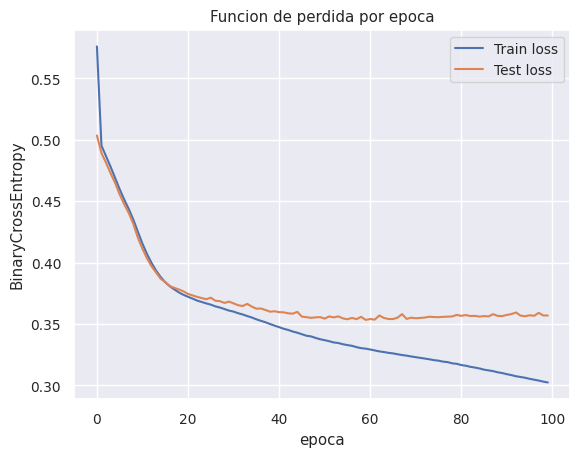

In [ ]:
fig, ax1= plt.subplots(1,1)
ax1.plot(train_loss, label="Train loss")
ax1.plot(test_loss, label="Test loss")
ax1.legend()
ax1.set_title("Funcion de perdida por epoca")
ax1.set_xlabel("epoca")
ax1.set_ylabel("BinaryCrossEntropy")

**Analisis**

Despues de utilizar embeddings con las caracteristicas product_id y user-id se tuvo un buen accuracy en set de entrenamiento, pero no tan bueno para el set de prueba.

Según la curva de la funcion de perdida por epoca se observa que la NN tiene overfitting. Para solventar esto se puede aplicar cualquier metodo Regularización (L1, L2, Dropout).